In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

"""
# 1. Loading the Data

This section loads the Nashville housing data from the CSV file into a Pandas DataFrame.

"""

In [5]:
file_path = '../data/raw/Nashville Housing.csv'

try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the path.")
    exit()

# Displays first few rows of data to make sure data loads correct
print(df.head())

print(df.info())

print(df.describe())



Data loaded successfully
   UniqueID          ParcelID        LandUse  \
0       2045  007 00 0 125.00  SINGLE FAMILY   
1      16918  007 00 0 130.00  SINGLE FAMILY   
2      54582  007 00 0 138.00  SINGLE FAMILY   
3      43070  007 00 0 143.00  SINGLE FAMILY   
4      22714  007 00 0 149.00  SINGLE FAMILY   

                      PropertyAddress            SaleDate SalePrice  \
0  1808  FOX CHASE DR, GOODLETTSVILLE       April 9, 2013    240000   
1  1832  FOX CHASE DR, GOODLETTSVILLE       June 10, 2014    366000   
2  1864 FOX CHASE  DR, GOODLETTSVILLE  September 26, 2016    435000   
3  1853  FOX CHASE DR, GOODLETTSVILLE    January 29, 2016    255000   
4  1829  FOX CHASE DR, GOODLETTSVILLE    October 10, 2014    278000   

     LegalReference SoldAsVacant                           OwnerName  \
0  20130412-0036474           No           FRAZIER, CYRENTHA LYNETTE   
1  20140619-0053768           No             BONER, CHARLES & LESLIE   
2  20160927-0101718           No           

"""
## 2. Understanding the Target Variable: SalePrice

`SalePrice`'s data type is currently object so let's convert it to a numeric type. After it's converted we can analyze it.

"""

In [7]:
df['SalePrice'] = pd.to_numeric(df['SalePrice'], errors='coerce')
print(df['SalePrice'].dtype)
print(df['SalePrice'].describe())

int64
count    5.647700e+04
mean     3.272264e+05
std      9.298326e+05
min      5.000000e+01
25%      1.350000e+05
50%      2.051000e+05
75%      3.285000e+05
max      5.427806e+07
Name: SalePrice, dtype: float64


"""

The `SalePrice` column is now converted. Let's move on to visualizing its distribution to understand its characteristics.

"""

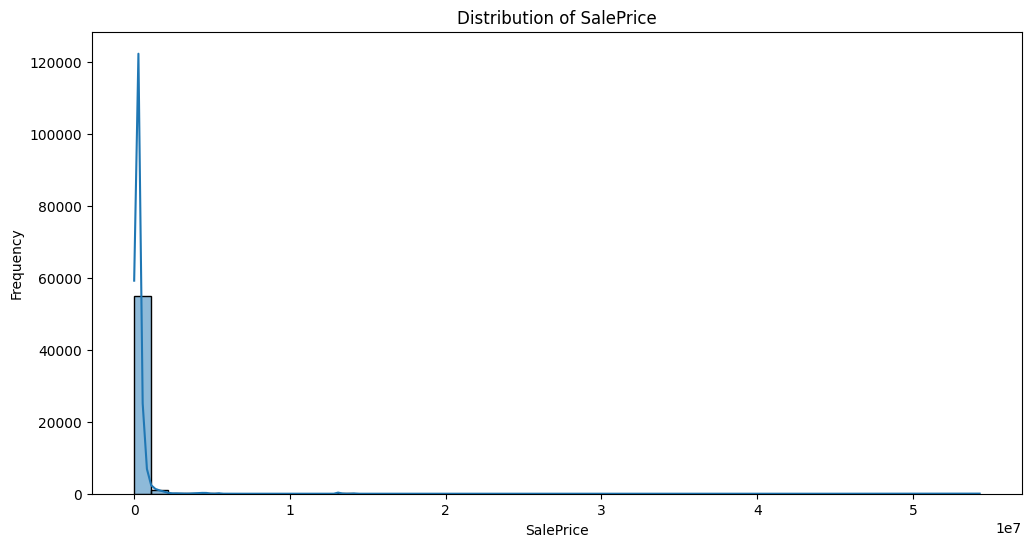

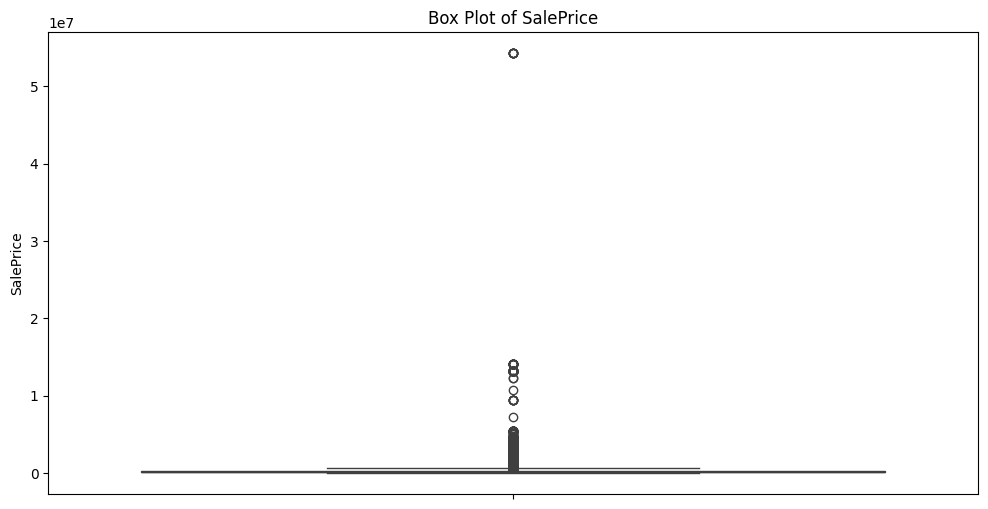

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['SalePrice'], kde=True, bins=50)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(y=df['SalePrice'])
plt.title('Box Plot of SalePrice')
plt.ylabel('SalePrice')
plt.show()

"""
## Initial Observations on SalePrice Distribution

The distribution of `SalePrice` is clearly right-skewed, indicating that a larger number of properties in this dataset sold at lower prices, with a tail extending towards higher-priced homes. This is a common characteristic of real estate data.

The box plot further highlights this skewness and also reveals the presence of potential outliers. We can see several data points significantly above the upper whisker, suggesting some very expensive properties. More notably, there's a single data point far below the lower whisker, with a sale price close to zero, which warrants immediate investigation.

Next, let's examine these extreme high and low `SalePrice` values to understand if they represent legitimate transactions or potential data errors that might need to be addressed before proceeding with further analysis and modeling.

"""